In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit, StratifiedKFold, TunedThresholdClassifierCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

import sklearn

import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors

from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score

from sklearn import svm
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.metrics import auc

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# должен быть понятен и очевиден отбор параметров модели
#
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
#

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
display(df.head())
display(df.describe())
display(df.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1294.000000,1294.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1294.000000,1293.000000,1295.000000,1295.000000
mean,8.438872,0.500920,0.298880,2.573398,0.085467,15.362934,44.651351,0.996576,3.303648,0.678415,10.676100,5.937452
std,1.818823,0.182181,0.200443,1.366700,0.045056,10.487662,35.420622,0.001968,0.157238,0.169927,1.174136,0.955717
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995315,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.455000,2.600000,0.090000,21.000000,57.000000,0.997765,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


None

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df = df.dropna()
missing_values = df.isnull().sum()
print("Количество пропущенных значений по признакам:")
print(missing_values)

Количество пропущенных значений по признакам:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


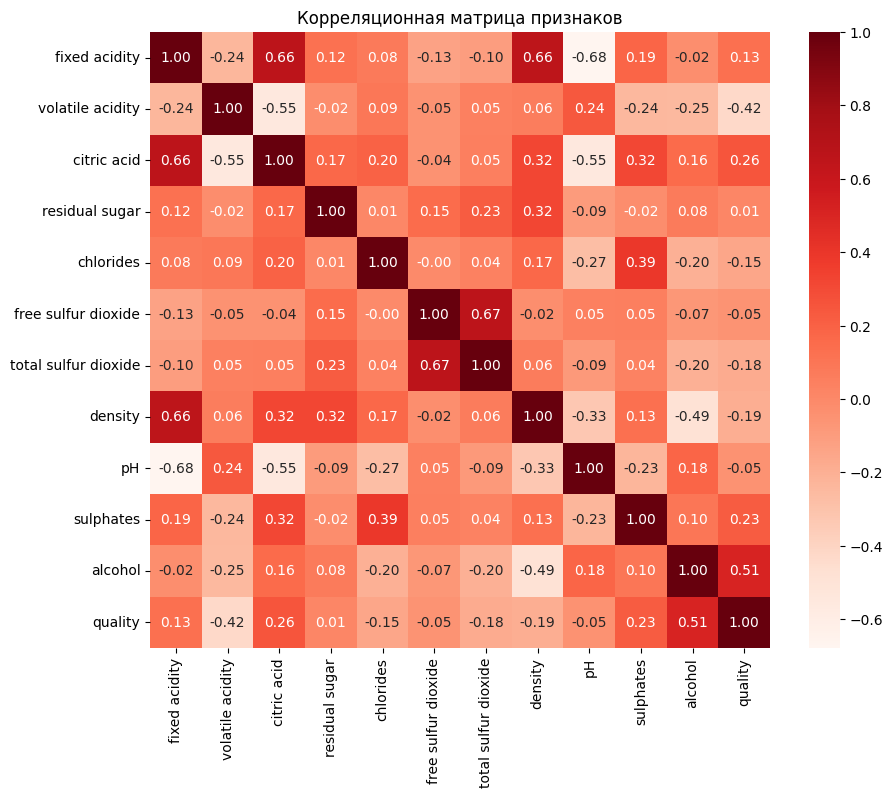

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

In [9]:
df.drop(['fixed acidity'], axis=1, inplace=True)

In [10]:
X = df.drop(['quality'], axis = 1)
y = df['quality']
y = y.apply(lambda y_value : 1 if y_value >= 7 else 0)
y = y.fillna(0).astype(int)

Соотношение классов:
 quality
0    877
1    138
Name: count, dtype: int64


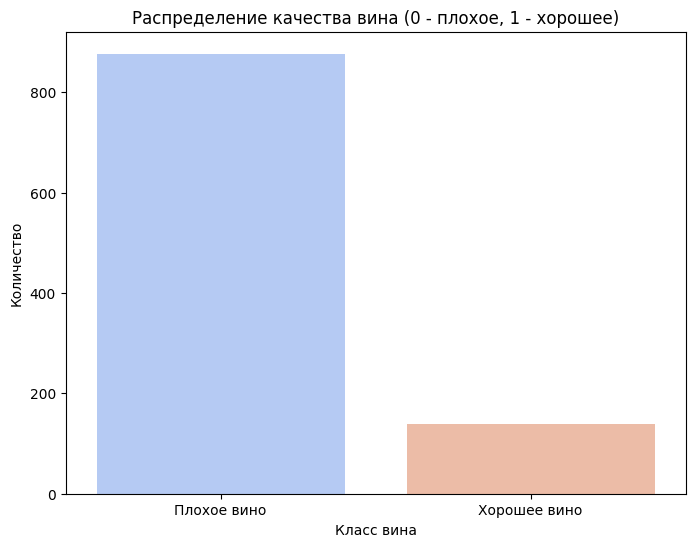

In [11]:
class_counts = y.value_counts()
print("Соотношение классов:\n", class_counts)

# Визуализация распределения классов
plt.figure(figsize=(8, 6))
sns.countplot(x=y, hue=y, palette='coolwarm', legend=False)
plt.title('Распределение качества вина (0 - плохое, 1 - хорошее)')
plt.xlabel('Класс вина')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Плохое вино', 'Хорошее вино'])
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52,
                                                    stratify = y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 155 to 1104
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      812 non-null    float64
 1   citric acid           812 non-null    float64
 2   residual sugar        812 non-null    float64
 3   chlorides             812 non-null    float64
 4   free sulfur dioxide   812 non-null    float64
 5   total sulfur dioxide  812 non-null    float64
 6   density               812 non-null    float64
 7   pH                    812 non-null    float64
 8   sulphates             812 non-null    float64
 9   alcohol               812 non-null    float64
dtypes: float64(10)
memory usage: 69.8 KB


### Построим самые простые модели для четырёх алгоритмов

In [42]:
model_NB = make_pipeline(Normalizer(),GaussianNB())
model_LR = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=3))
model_KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 3, p=2, weights = 'distance'))
model_SVM = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))

model_NB.fit(X_train,y_train)
model_LR.fit(X_train,y_train)
model_KNN.fit(X_train,y_train)
model_SVM.fit(X_train,y_train)

y_NB_pred = model_NB.predict(X_test)
y_LR_pred = model_LR.predict(X_test)
y_KNN_pred = model_KNN.predict(X_test)
y_SVM_pred = model_SVM.predict(X_test)

print('Precision NB: ', precision_score(y_test, y_NB_pred, average='weighted'))
print('Precision LR: ', precision_score(y_test,  y_LR_pred, average='weighted'))
print('Precision KNN: ', precision_score(y_test,  y_KNN_pred, average='weighted'))
print('Precision SVM: ', precision_score(y_test,  y_SVM_pred, average='weighted'))

Precision NB:  0.8495838287752676
Precision LR:  0.8714844705306921
Precision KNN:  0.8840812799308665
Precision SVM:  0.8489993581889257


### Наивный Байесовский классификатор

In [43]:
pipe_NB = Pipeline([('preprocessing', MinMaxScaler()),
                    ('clf', GaussianNB())])

cv_NB = StratifiedShuffleSplit(test_size=0.2, n_splits=5, random_state=42)
scaling_NB = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

param_grid_NB = [
    {'preprocessing': scaling_NB,
     'clf': [GaussianNB()]}
]

grid_NB = GridSearchCV(pipe_NB, param_grid_NB, scoring='precision_weighted', cv=cv_NB, n_jobs=-1)
grid_NB.fit(X_train, y_train)

print("Наилучшие значения параметров: {}".format(grid_NB.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_NB.best_score_))

Наилучшие значения параметров: {'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}
Наилучшее значение кросс-валидац. правильности:0.87


#### Наивный Байесовский классификатор с лучшими параметрами

In [15]:
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid_NB.score(X_test, y_test)))

Правильность для наилучшей модели на тестовом наборе: 0.901937



In [16]:
best_model_NB = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', GaussianNB())])
best_model_NB.fit(X_train, y_train)
y_best_NB_pred = best_model_NB.predict(X_test)

### Логистическая регрессия

In [17]:
pipe_LR = Pipeline([('preprocessing', MinMaxScaler()),
                 ('clf', LogisticRegression(max_iter = 7000))])

cv_LR = StratifiedShuffleSplit(test_size = 0.2, n_splits = 5, random_state = 42)
scaling_LR = [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid_LR =[
    {'preprocessing': scaling_LR,'clf__penalty': ['l2'],
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling_LR,'clf__penalty': ['l1'],
         'clf__solver': ['liblinear','saga']},
    {'preprocessing': scaling_LR,'clf__penalty': [None],
         'clf__solver': ['newton-cg' ,'lbfgs','sag', 'saga']}
    ]

grid_LR = GridSearchCV(pipe_LR, param_grid_LR, scoring = 'precision_weighted', cv = cv_LR, n_jobs=-1)
grid_LR.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_LR.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_LR.best_score_))

Наилучшие значения параметров: {'clf__penalty': None, 'clf__solver': 'lbfgs', 'preprocessing': Normalizer()}
Наилучшее значение кросс-валидац. правильности:0.88


#### Логистическая регрессия с лучшими параметрами

In [18]:
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid_LR.score(X_test, y_test)))

Правильность для наилучшей модели на тестовом наборе: 0.912827



In [27]:
best_model_LR = Pipeline([
    ('preprocessing', Normalizer()),
    ('clf', LogisticRegression(penalty=None, solver='lbfgs'))
])
best_model_LR.fit(X_train, y_train)
y_best_LR_pred = best_model_LR.predict(X_test)

## k ближайших соседей

In [20]:
pipe_knn = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', KNeighborsClassifier())])

cv_knn = StratifiedShuffleSplit(test_size = 0.2, n_splits = 5, random_state = 42)

n_neighbors = range(1, 100, 2)
p = range(1, 15, 2)
weights=['uniform','distance']
scaling_knn = [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid_knn =[
    {'preprocessing': scaling_knn,
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, scoring = 'precision_weighted', cv = cv_knn, n_jobs=-1)
grid_knn.fit(X_train,y_train)
print("Наилучшие значения параметров: {}".format(grid_knn.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_knn.best_score_))

Наилучшие значения параметров: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 23, 'classifier__p': 7, 'classifier__weights': 'distance', 'preprocessing': MinMaxScaler()}
Наилучшее значение кросс-валидац. правильности:0.90


#### k ближайших соседей с лучшими параметрами

In [21]:
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid_knn.score(X_test, y_test)))

Правильность для наилучшей модели на тестовом наборе: 0.847746



In [28]:
best_model_knn = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', KNeighborsClassifier(n_neighbors = 23, p = 7, weights = 'distance', n_jobs = -1))])
best_model_knn.fit(X_train, y_train)
y_best_knn_pred = best_model_knn.predict(X_test)

### Метод опорных векторов

In [23]:
pipe_svm = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', svm.SVC(kernel = 'linear', class_weight = 'balanced', probability = True))])

cv_svm = StratifiedShuffleSplit(test_size = 0.2, n_splits = 5, random_state = 42)

C = np.linspace(0.5, 5, 10)
gamma = np.arange(0.1,1.0, 0.1)

scaling_svm = [MinMaxScaler(), StandardScaler(), RobustScaler()]

param_grid_svm =[
    {'preprocessing': scaling_svm,
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, scoring = 'precision_weighted', cv = cv_svm, n_jobs=-1)
grid_svm.fit(X_train,y_train)
print("Наилучшие значения параметров: {}".format(grid_svm.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_svm.best_score_))

Наилучшие значения параметров: {'classifier': SVC(), 'classifier__C': 1.0, 'classifier__gamma': 0.30000000000000004, 'preprocessing': StandardScaler()}
Наилучшее значение кросс-валидац. правильности:0.89


#### Метод опорных векторов с лучшими параметрами

In [29]:
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid_svm.score(X_test, y_test)))

Правильность для наилучшей модели на тестовом наборе: 0.895769



In [30]:
best_model_svm = Pipeline([('preprocessing', StandardScaler()),
                 ('classifier', svm.SVC(C = 1, gamma = 0.30000000000000004))])
best_model_svm.fit(X_train, y_train)
y_best_svm_pred = best_model_svm.predict(X_test)

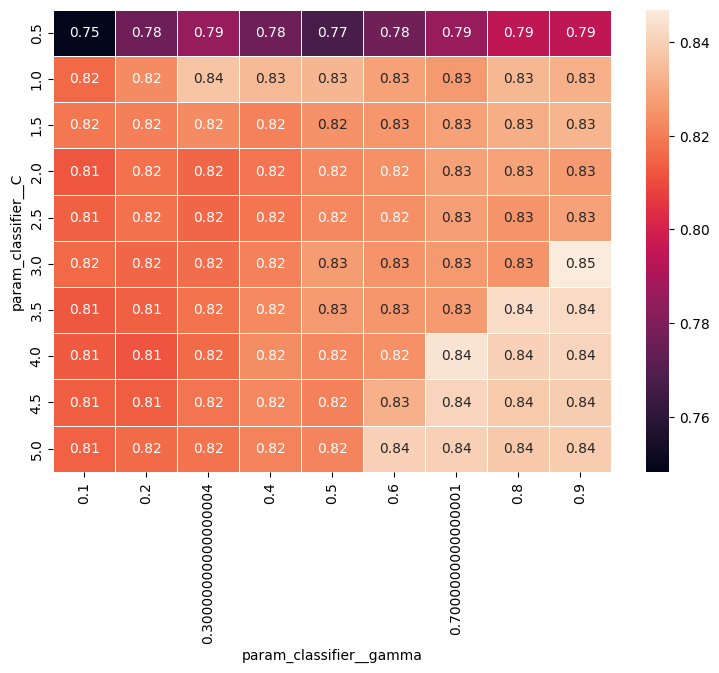

In [31]:
table =pd.DataFrame(grid_svm.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

#### Следовательно лучший precision у модели Логистической регресии

### Матрицы ошибок

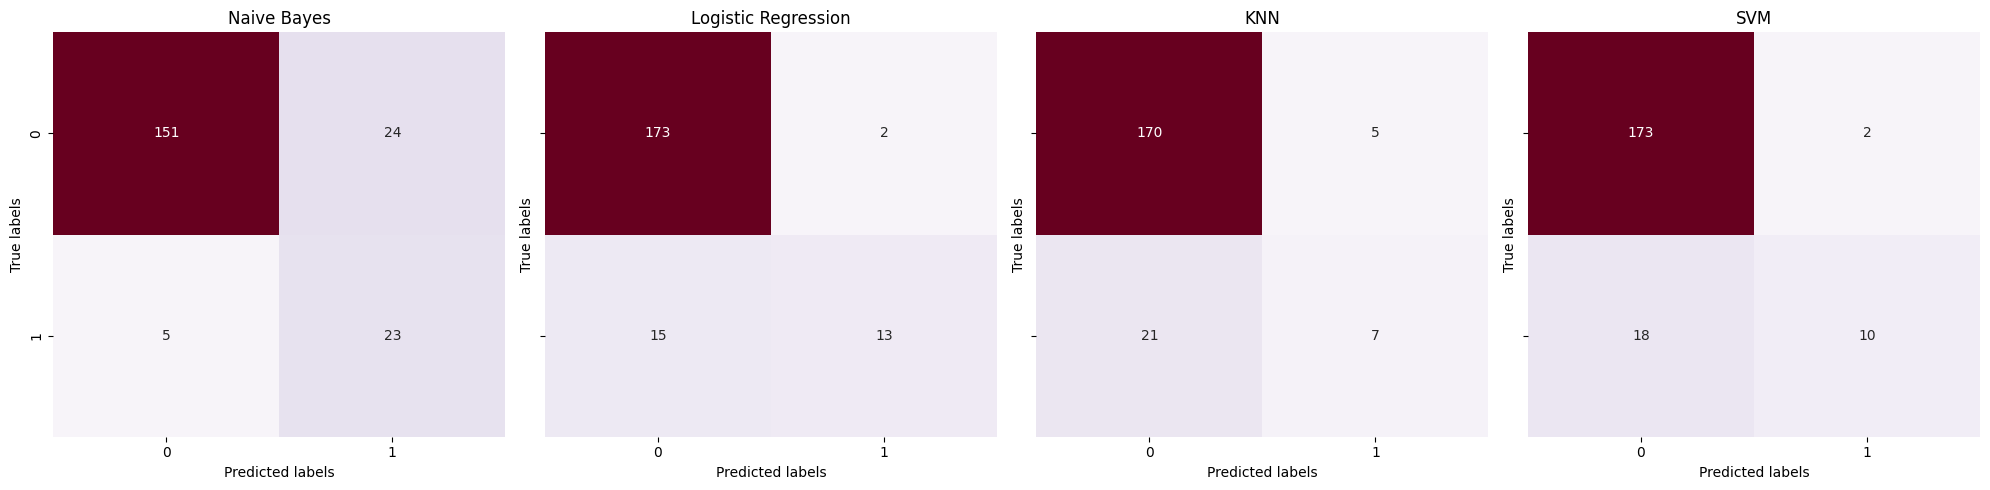

In [32]:
matrix_NB = confusion_matrix(y_test,y_best_NB_pred)
matrix_LR = confusion_matrix(y_test,y_best_LR_pred)
matrix_knn = confusion_matrix(y_test,y_best_knn_pred)
matrix_svm = confusion_matrix(y_test, y_best_svm_pred)

fig,ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20,5))

ax[0].set_title('Naive Bayes')
sns.heatmap(matrix_NB, annot=True, fmt='g', cbar=None, cmap="PuRd", ax=ax[0])

ax[1].set_title('Logistic Regression')
sns.heatmap(matrix_LR, annot=True, fmt='g', cbar=None, cmap="PuRd", ax=ax[1])

ax[2].set_title('KNN')
sns.heatmap(matrix_knn, annot=True, fmt='g', cbar=None, cmap="PuRd", ax=ax[2])

ax[3].set_title('SVM')
sns.heatmap(matrix_svm, annot=True, fmt='g', cbar=None, cmap="PuRd", ax=ax[3])

for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')

plt.tight_layout()
plt.show()

#### ROC AUC

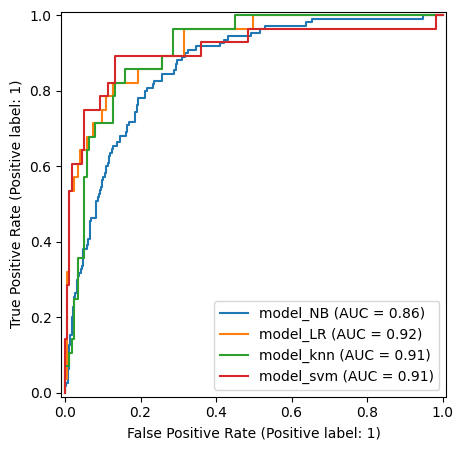

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

RocCurveDisplay.from_estimator(best_model_NB, X_train, y_train, ax = ax, name = 'model_NB');
RocCurveDisplay.from_estimator(best_model_LR, X_test, y_test, ax = ax, name = 'model_LR');
RocCurveDisplay.from_estimator(best_model_knn, X_test, y_test, ax = ax, name = 'model_knn');
RocCurveDisplay.from_estimator(best_model_svm, X_test, y_test, ax = ax, name = 'model_svm');

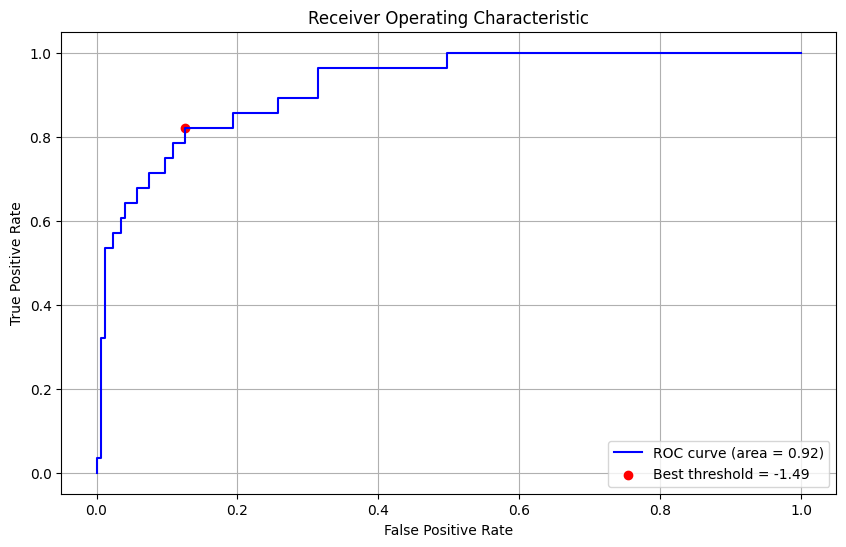

Оптимальный порог по ROC: -1.49


In [35]:
y_scores = best_model_LR.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

optimal_idx = np.argmin(np.sqrt((1 - tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', marker='o', label='Best threshold = {:.2f}'.format(optimal_threshold))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"Оптимальный порог по ROC: {optimal_threshold:.2f}")

#### Логистическая регрессия с оптимальными параметрами и новым порогом

In [40]:
new_best_model_LR = Pipeline([
    ('preprocessing', Normalizer()),
    ('clf', LogisticRegression(penalty=None, solver='lbfgs'))
])
new_best_model_LR.fit(X_train, y_train)

y_scores = new_best_model_LR.decision_function(X_test)
custom_threshold = -1.49
y_scores = np.where(y_scores > custom_threshold, 1, 0)

precision = precision_score(y_test, y_scores, average = 'weighted')
print(f"Точность модели при пороге для decision {custom_threshold}: {precision:.2f}")

Точность модели на пороге -1.49: 0.90
